In [1]:
%load_ext autoreload
%autoreload 2

# Load experiment_groups from disk
import dill
from disruption_survival_analysis.sweep_config import get_experiments

with open(f"experiment_groups_flattop_no_overlap.pkl", 'rb') as f:
    experiment_groups = dill.load(f)

c:\Users\zkeith\proj\disruption-survival-analysis\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Get total number of disruptive and non-disruptive shots in the dataset
from disruption_survival_analysis.manage_datasets import load_disruptive_shot_list, load_non_disruptive_shot_list

device = 'd3d'
dataset_name = 'paper'

for category in ['train', 'val', 'test']:
    disruptive_shots = len(load_disruptive_shot_list(device, dataset_name, category))
    non_disruptive_shots = len(load_non_disruptive_shot_list(device, dataset_name, category))
    print(f"{category} disruptive shots: {disruptive_shots}")
    print(f"{category} non-disruptive shots: {non_disruptive_shots}")



train disruptive shots: 328
train non-disruptive shots: 4122
val disruptive shots: 110
val non-disruptive shots: 1374
test disruptive shots: 110
test non-disruptive shots: 1374


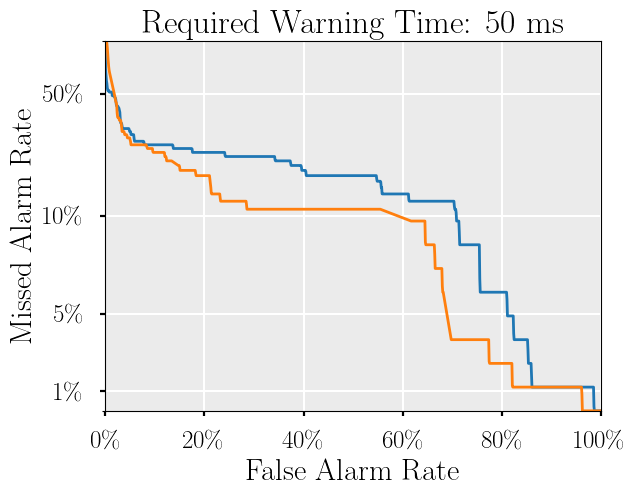

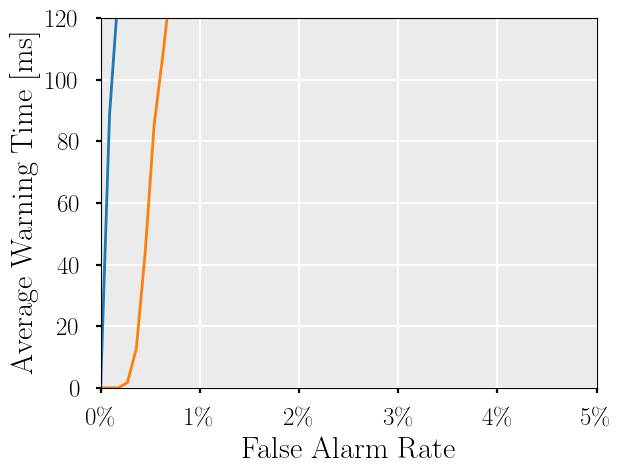

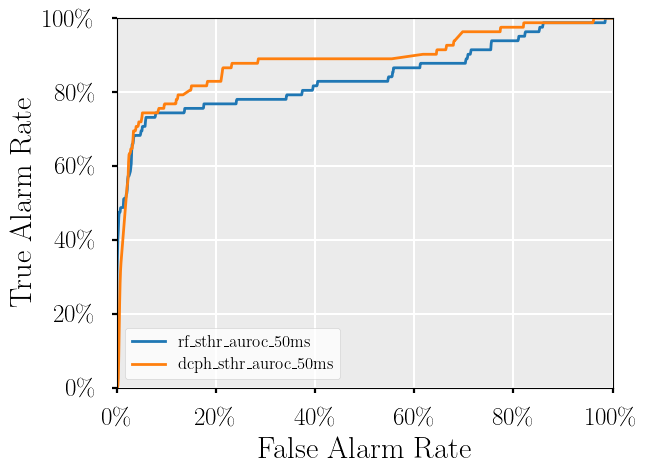

rf_sthr_auroc_50ms: 0.8405608440351
dcph_sthr_auroc_50ms: 0.8842501283156291


In [8]:
required_warning_time = 0.05

#dataset_path = 'sql_strict_flattop/stack_10'
#dataset_path = 'sql_match/stack_10'
dataset_path = dataset_name

# experiment_list = get_experiments(experiment_groups,
#                                   [dataset_path, 'rf', 'auroc', required_warning_time],
#                                   [dataset_path, 'km', 'auroc', required_warning_time],
#                                   [dataset_path, 'cph', 'auroc', required_warning_time],
#                                   [dataset_path, 'dsm', 'auroc', required_warning_time])

experiment_list = get_experiments(experiment_groups,
                                  [dataset_path, 'rf', 'auroc', required_warning_time],
                                  [dataset_path, 'dcph', 'auroc', required_warning_time])

from disruption_survival_analysis.plot_experiments import plot_missed_alarm_rates_vs_false_alarm_rates, plot_avg_warning_times_vs_false_alarm_rates, plot_true_alarm_rates_vs_false_alarm_rates

plot_missed_alarm_rates_vs_false_alarm_rates(experiment_list)
plot_avg_warning_times_vs_false_alarm_rates(experiment_list, required_warning_time)
plot_true_alarm_rates_vs_false_alarm_rates(experiment_list)

for experiment in experiment_list:
    auroc = experiment.evaluate_metric('auroc')
    name = experiment.name
    print(f"{name}: {auroc}")
